In [1]:
# from quchem.Hamiltonian_Generator_Functions import *
# from quchem.Graph import *
# ### HAMILTONIAN start
# Molecule = 'H2'
# geometry = [('H', (0., 0., 0.)), ('H', (0., 0., 0.74))]
# basis = 'sto-3g'


# ### Get Hamiltonian
# Hamilt = Hamiltonian_PySCF(Molecule,
#                      run_scf=1, run_mp2=1, run_cisd=1, run_ccsd=1, run_fci=1,
#                      basis=basis,
#                      multiplicity=1,
#                      geometry=geometry)  # normally None!
# QubitHamiltonian = Hamilt.Get_Qubit_Hamiltonian(threshold=None, transformation='BK')
# ### HAMILTONIAN end

# #####################################

# print(QubitHamiltonian)

# const_list=[]
# P_list=[]
# for Pauli, Const in QubitHamiltonian.terms.items():
#     P_list.append(Pauli)
#     const_list.append(Const)
    
# print(P_list)
# print('')
# print(const_list)
# fci_energy = Hamilt.molecule.fci_energy
# print(fci_energy)

In [2]:
fci_energy = -1.137283834488502

P_list = [(),
 ((0, 'Z'),),
 ((0, 'Z'), (1, 'Z')),
 ((2, 'Z'),),
 ((1, 'Z'), (2, 'Z'), (3, 'Z')),
 ((1, 'Z'),),
 ((0, 'Y'), (1, 'Z'), (2, 'Y'), (3, 'Z')),
 ((0, 'X'), (1, 'Z'), (2, 'X')),
 ((0, 'X'), (1, 'Z'), (2, 'X'), (3, 'Z')),
 ((0, 'Y'), (1, 'Z'), (2, 'Y')),
 ((0, 'Z'), (2, 'Z')),
 ((0, 'Z'), (1, 'Z'), (2, 'Z'), (3, 'Z')),
 ((0, 'Z'), (1, 'Z'), (2, 'Z')),
 ((0, 'Z'), (2, 'Z'), (3, 'Z')),
 ((1, 'Z'), (3, 'Z'))]

const_list = [(-0.09706626816762878+0j),
 (0.1714128264477689+0j),
 (0.17141282644776892+0j),
 (-0.22343153690813564+0j),
 (-0.22343153690813558+0j),
 (0.16868898170361207+0j),
 (0.045302615503799264+0j),
 (0.045302615503799264+0j),
 (0.045302615503799264+0j),
 (0.045302615503799264+0j),
 (0.12062523483390414+0j),
 (0.1659278503377034+0j),
 (0.1659278503377034+0j),
 (0.12062523483390414+0j),
 (0.1744128761226159+0j)]

from openfermion.ops import QubitOperator
QubitHamiltonian = QubitOperator()

for P_word, const in zip(P_list, const_list):
    QubitHamiltonian+=QubitOperator(P_word, const)
QubitHamiltonian

(-0.09706626816762878+0j) [] +
(0.045302615503799264+0j) [X0 Z1 X2] +
(0.045302615503799264+0j) [X0 Z1 X2 Z3] +
(0.045302615503799264+0j) [Y0 Z1 Y2] +
(0.045302615503799264+0j) [Y0 Z1 Y2 Z3] +
(0.1714128264477689+0j) [Z0] +
(0.17141282644776892+0j) [Z0 Z1] +
(0.1659278503377034+0j) [Z0 Z1 Z2] +
(0.1659278503377034+0j) [Z0 Z1 Z2 Z3] +
(0.12062523483390414+0j) [Z0 Z2] +
(0.12062523483390414+0j) [Z0 Z2 Z3] +
(0.16868898170361207+0j) [Z1] +
(-0.22343153690813558+0j) [Z1 Z2 Z3] +
(0.1744128761226159+0j) [Z1 Z3] +
(-0.22343153690813564+0j) [Z2]

In [3]:
const_list

[(-0.09706626816762878+0j),
 (0.1714128264477689+0j),
 (0.17141282644776892+0j),
 (-0.22343153690813564+0j),
 (-0.22343153690813558+0j),
 (0.16868898170361207+0j),
 (0.045302615503799264+0j),
 (0.045302615503799264+0j),
 (0.045302615503799264+0j),
 (0.045302615503799264+0j),
 (0.12062523483390414+0j),
 (0.1659278503377034+0j),
 (0.1659278503377034+0j),
 (0.12062523483390414+0j),
 (0.1744128761226159+0j)]

From Helgaker, T., P. Jorgensen,and J. Olsen (2014),Molecularelectronic-structure theory(John Wiley & Sons)
we known

$$H_{2}^{ground} = 0.9939| 1100\rangle - 0.1106| 0011\rangle$$

From group theory we know only double excitation terms are important!
We can see this from our ijab operators that qubits 1 and 3 are only acted on by $Z$ therefore experience no population changes... Can even see this from the answer if we write it in BK basis:

$$H_{2}^{BK} = 0.9939| 1000\rangle - 0.1106| 0010\rangle$$

See how qubits 1 and 3 always remain at 0!

therefore can **remove** these measurements from Hamiltonian... as we know what expectation values they should give!

In the case for this Hamiltonian only $I$ and $Z$ act on these qubits! So even easier to remove (expectation values = +1 (as act on $| 0\rangle$ state!), so just remove and add to relivent H terms!

LOOK at:

PHYS. REV. X, **8**, 031022 (2018)

### Can remove these terms from Hamiltonian

In [4]:
from quchem.Ansatz_Generator_Functions import *
n_electrons=2
n_qubits=4

ansatz_obj = BK_Qubit_Reduction(QubitHamiltonian,
                             n_electrons,
                             n_qubits)

indices_to_Remove = np.array([1,3])
print('qubit indices:', indices_to_Remove, 'only acted on by I or Z')

reduced_Qubit_Hamiltonian = ansatz_obj.Remove_indices_from_Hamiltonian(indices_to_Remove)
reduced_Qubit_Hamiltonian

qubit indices: [1 3] only acted on by I or Z


(0.2460355896585992+0j) [] +
(0.09060523100759853+0j) [X0 X2] +
(0.09060523100759853+0j) [Y0 Y2] +
(0.3428256528955378+0j) [Z0] +
(0.5731061703432151+0j) [Z0 Z2] +
(-0.4468630738162712+0j) [Z2]

### Can remove these terms from Anstz

# NEXT need to re-label everything

In [5]:
relabel_dict, relabelled_reduced_Qubit_Hamiltonian = ansatz_obj.Re_label_Hamiltonian(reduced_Qubit_Hamiltonian)

print('qubit relabelling dict = ', relabel_dict)

relabelled_reduced_Qubit_Hamiltonian

qubit relabelling dict =  {0: 0, 2: 1}


(0.2460355896585992+0j) [] +
(0.09060523100759853+0j) [X0 X1] +
(0.09060523100759853+0j) [Y0 Y1] +
(0.3428256528955378+0j) [Z0] +
(0.5731061703432151+0j) [Z0 Z1] +
(-0.4468630738162712+0j) [Z1]

## Find New input state

In [6]:
print('old input = ', ansatz_obj.Get_BK_HF_state_in_OCC_basis())
print('BUT following indices removed:', indices_to_Remove)
ansatz_obj.New_BK_HF_state(indices_to_Remove)

old input =  [1. 0. 0. 0.]
BUT following indices removed: [1 3]


array([1., 0.])

# Find what new FCI energy is
- here should be the same as true answer!

In [7]:
from openfermion import qubit_operator_sparse
new_Molecular_H_MATRIX =  qubit_operator_sparse(relabelled_reduced_Qubit_Hamiltonian)

from scipy.linalg import eig
eig_values, eig_vectors = eig(new_Molecular_H_MATRIX.todense())
new_FCI_Energy = min(eig_values)


print('new_FCI = ', new_FCI_Energy, 'VS old FCI:', fci_energy)

new_FCI =  (-1.1372838344885006+0j) VS old FCI: -1.137283834488502


In [8]:
(-1.136914014427481+1.137283834488502)*1000

0.36982006102093123

# Anstaz


From PHYS. REV. X, **8**, 031022 (2018):

$$U = e^{-i \theta Y_{0} X_{1}}$$

- when acting on $| 10 \rangle_{HF-BK-STATE}$ 

$$U | \psi_{HF}\rangle = | \psi_{UCCSD}\rangle$$

overall we get:

$\begin{aligned} U|01\rangle &=\left(\cos (\theta) I-i \sin (\theta) Y_{0} X_{1}\right)|10\rangle \\ &=\cos (\theta)|10\rangle-\sin (\theta)|11\rangle \end{aligned}$

- note $Y|1\rangle = -i|1\rangle$

to do this in Q.C the following circuit is employed:

In [9]:
# from quchem.Ansatz_Generator_Functions import *
# # n_electrons=Hamilt.molecule.n_electrons
# # n_qubits= Hamilt.molecule.n_qubit
# n_electrons=2
# n_qubits= 4

# ansatz_obj = Ansatz(n_electrons, n_qubits)



# Sec_Quant_CC_ops_ia, Sec_Quant_CC_ops_ijab, theta_parameters_ia, theta_parameters_ijab=ansatz_obj.Get_ia_and_ijab_terms(single_cc_amplitudes=None, 
#                                                                                                              double_cc_amplitudes=None, 
#                                                                                                              singles_hamiltonian=None,
#                                                                                                              doubles_hamiltonian=None, 
#                                                                                                              tol_filter_small_terms = None)

# Qubit_Op_list_Second_Quant_CC_Ops_ia, Qubit_Op_list_Second_Quant_CC_Ops_ijab = ansatz_obj.UCCSD_single_trotter_step(Sec_Quant_CC_ops_ia,
#                                                                                                                     Sec_Quant_CC_ops_ijab,
#                                                                                                                    transformation='BK')


In [10]:
# input_state = ansatz_obj.Get_BK_HF_state_in_OCC_basis()
# print(input_state)

# UCCSD_ansatz_Q_Circ_obj = Ansatz_Circuit(input_state,
#                                      Qubit_Op_list_Second_Quant_CC_Ops_ia, 
#                                      Qubit_Op_list_Second_Quant_CC_Ops_ijab)

# UCCSD_ansatz_Q_Circ =UCCSD_ansatz_Q_Circ_obj.Get_Full_HF_UCCSD_QC(Theta_param_list_ia=theta_parameters_ia, 
#                                          Theta_param_list_ijab=theta_parameters_ijab,
#                                          ia_first=True)
# UCCSD_ansatz_Q_Circ

In [11]:
# Qubit_Op_list_Second_Quant_CC_Ops_ijab

In [12]:
# print('double e- operators:')
# print(Qubit_Op_list_Second_Quant_CC_Ops_ijab)

# ansatz_obj = BK_Qubit_Reduction(QubitHamiltonian,
#                              n_electrons,
#                              n_qubits)

# indices_to_Remove = ansatz_obj.Find_Qubits_only_acted_on_by_I_or_Z(Qubit_Op_list_Second_Quant_CC_Ops_ijab)
# print('')
# print('qubit indices:', indices_to_Remove, 'only acted on by I or Z')

In [13]:
# reduced_ijab_CC = ansatz_obj.Remove_indices_from_CC_qubit_operators(Qubit_Op_list_Second_Quant_CC_Ops_ijab,
#                                                              indices_to_Remove)
# reduced_ijab_CC

In [14]:
# relabelled_reduced_ijab_CC = ansatz_obj.Re_label_CC_qubit_operators(relabel_dict, reduced_ijab_CC)
# relabelled_reduced_ijab_CC

In [15]:
from quchem.Simulating_Quantum_Circuit import *
from quchem.Ansatz_Generator_Functions import *
from openfermion.ops import QubitOperator

def H2_ansatz_BK(theta):
    
    HF_circ = [cirq.X.on(cirq.LineQubit(0))]
    full_exp_circ_obj = full_exponentiated_PauliWord_circuit(QubitOperator('Y0 X1', -1j), theta)
        
    UCCSD_circ = cirq.Circuit(cirq.decompose_once((full_exp_circ_obj(*cirq.LineQubit.range(full_exp_circ_obj.num_qubits())))))
    full_circuit = cirq.Circuit([*HF_circ, *UCCSD_circ.all_operations()])
    
    return full_circuit
    
circuit_form = H2_ansatz_BK(np.pi/10)    
circuit_form

0: ───X───Rx(0.5π)───@──────────────@───Rx(-0.5π)───
                     │              │
1: ───H──────────────X───Rz(0.2π)───X───H───────────

# Unitary Partitioning

In [16]:
from quchem.LCU_method import *

In [17]:
# Hamiltonian_graph_obj = Openfermion_Hamiltonian_Graph(relabelled_reduced_Qubit_Hamiltonian)

# commutativity_flag = 'AC' ## <- defines relationship between sets!!!
# plot_graph = False
# Graph_colouring_strategy='largest_first'
# anti_commuting_sets = Hamiltonian_graph_obj.Get_Clique_Cover_as_QubitOp(commutativity_flag, Graph_colouring_strategy=Graph_colouring_strategy, plot_graph=plot_graph)
# anti_commuting_sets

# Graph_sets_dict={}
# for key in anti_commuting_sets:
#     terms=[]
#     for QubitOp in anti_commuting_sets[key]:
#         terms.append(*tuple(QubitOp.terms.items()))
#     Graph_sets_dict[key]=(terms)
# Graph_sets_dict

In [18]:
Graph_sets_dict = {0: [(((0, 'Z'), (1, 'Z')), (0.5731061703432151+0j))],
 1: [((), (0.2460355896585992+0j))],
 2: [(((0, 'Y'), (1, 'Y')), (0.09060523100759853+0j)),
  (((0, 'Z'),), (0.3428256528955378+0j))],
 3: [(((1, 'Z'),), (-0.4468630738162712+0j)),
  (((0, 'X'), (1, 'X')), (0.09060523100759853+0j))]}


anti_commuting_sets={}
for key in Graph_sets_dict:
    terms=[]
    for PauliWord, const in Graph_sets_dict[key]:
        terms.append(QubitOperator(PauliWord, const))
    anti_commuting_sets[key]=terms
anti_commuting_sets

{0: [(0.5731061703432151+0j) [Z0 Z1]],
 1: [(0.2460355896585992+0j) []],
 2: [(0.09060523100759853+0j) [Y0 Y1], (0.3428256528955378+0j) [Z0]],
 3: [(-0.4468630738162712+0j) [Z1], (0.09060523100759853+0j) [X0 X1]]}

## Sequence of Rotations method

In [19]:
from quchem.Unitary_partitioning import *

In [20]:
import random
# theta_ijab= random.uniform(0, 2*np.pi)
theta_ijab=1

In [21]:
## example circuit
set_index=3
S_index=0

ansatz_cirq_circuit = H2_ansatz_BK(theta_ijab)
full_circuit, Ps, gamma_l = Generate_Full_Q_Circuit_Conj_NO_M_gates(ansatz_cirq_circuit, 
                                                         anti_commuting_sets[set_index], 
                                                         S_index, 
                                                         check_reduction=True)
full_circuit

0: ───X───Rx(0.5π)───@────────────────@───Rx(-0.5π)───H──────────@───────────────────────────────────@───H───────────
                     │                │                          │                                   │
1: ───H──────────────X───Rz(0.637π)───X───H───────────Rx(0.5π)───X───Rz((-0.9363232430649462+0j)π)───X───Rx(-0.5π)───

In [22]:
def GIVE_ENERGY_lin_alg_ROTATIONS(theta_ijab):
    

    ansatz_cirq_circuit = H2_ansatz_BK(theta_ijab)

    
    VQE_exp_CONJ_lin_alg = VQE_Experiment_Conj_UP_lin_alg(
                 anti_commuting_sets,
                 ansatz_cirq_circuit,
                 S_key_dict=None)

    
    energy = VQE_exp_CONJ_lin_alg.Calc_Energy()
    
    return energy

In [23]:
GIVE_ENERGY_lin_alg_ROTATIONS(theta_ijab)

-0.1632183220308672

In [24]:
def GIVE_ENERGY_Q_CIRC_ROTATIONS(theta_ijab, n_shots):
    

    ansatz_cirq_circuit = H2_ansatz_BK(theta_ijab)

    
    VQE_exp_ROT = VQE_Experiment_Conj_UP(
                  anti_commuting_sets, 
                    ansatz_cirq_circuit,
                    n_shots,
                    S_key_dict=None)
    
    energy = VQE_exp_ROT.Calc_Energy()
    
    return energy

# optimizing

In [25]:
from openfermion.transforms import get_sparse_operator

def Analytical_Gradient_H2(theta_ijab, n_shots_FILLER):#, QubitHamiltonian=relabelled_reduced_Qubit_Hamiltonian):
    
    QubitHamiltonian=relabelled_reduced_Qubit_Hamiltonian
    
    H_matrix = get_sparse_operator(QubitHamiltonian).todense()   
    input_ket = np.array([[1],[0],[0],[0]])
    
    theta_ijab_plus = theta_ijab + np.pi/4
    ansatz_cirq_circuit_plus = H2_ansatz_BK(theta_ijab_plus)

    circuit_matrix_plus = ansatz_cirq_circuit_plus.unitary()
    ket_plus = circuit_matrix_plus.dot(input_ket)
    exp_plus= ket_plus.transpose().conj().dot(H_matrix.dot(ket_plus))
    
    theta_ijab_minus = theta_ijab - np.pi/4
    ansatz_cirq_circuit_minus = H2_ansatz_BK(theta_ijab_minus)
    circuit_matrix_minus = ansatz_cirq_circuit_minus.unitary()
    ket_minus = circuit_matrix_minus.dot(input_ket)
    exp_minus= ket_minus.transpose().conj().dot(H_matrix.dot(ket_minus))

    gradient = (exp_plus - exp_minus).real
    
    return np.ravel(gradient)

In [26]:
from quchem.Scipy_Optimizer import Optimizer, Custom_Adam

0: Input_to_Funct: [0.9]: Output: -0.32086841541939864
1: Input_to_Funct: [0.79995105]: Output: -0.4796865997840977
2: Input_to_Funct: [0.69995307]: Output: -0.6443603888114579
3: Input_to_Funct: [0.60026329]: Output: -0.7759029442123015
4: Input_to_Funct: [0.50135444]: Output: -0.9055615059007998
5: Input_to_Funct: [0.40398468]: Output: -1.0030809290209362
6: Input_to_Funct: [0.30926984]: Output: -1.0775711354270303
7: Input_to_Funct: [0.21873061]: Output: -1.1170652233283584
8: Input_to_Funct: [0.13426643]: Output: -1.1365289130849634
9: Input_to_Funct: [0.05800225]: Output: -1.1327802283374302
10: Input_to_Funct: [-0.00800394]: Output: -1.1161437891292456
11: Input_to_Funct: [-0.06211535]: Output: -1.0886561775882657
12: Input_to_Funct: [-0.10338758]: Output: -1.0606110566972684
13: Input_to_Funct: [-0.13164962]: Output: -1.0439443065719143
14: Input_to_Funct: [-0.14740276]: Output: -1.0362134549345314
15: Input_to_Funct: [-0.15162872]: Output: -1.0270236731830693
16: Input_to_Funct

     fun: -1.1369848691295845
 message: 'Optimization terminated successfully.'
    nfev: 27
     nit: 27
    njev: 27
  status: 0
 success: True
       x: array([0.15967826])

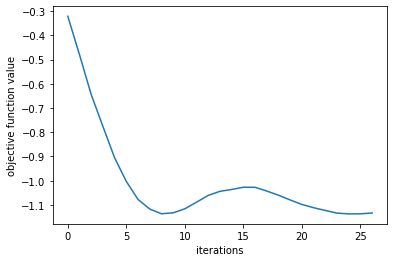

In [27]:
# circuit simulation sequence of Rotations

# theta_ijab_random_input= random.uniform(0, 2*np.pi)
theta_ijab_random_input=1
n_shots=10000

custom_optimizer_DICT = {'learning_rate': 0.1, 'beta_1': 0.9, 'beta_2': 0.999, 'epsilon': 1e-8,
                           'maxfev': 15000}


ROT_optimization = Optimizer(GIVE_ENERGY_Q_CIRC_ROTATIONS,
                   theta_ijab_random_input,
                   args=(n_shots,),
                   method=Custom_Adam, 
                   jac=Analytical_Gradient_H2,
                   hess=None,
                   hessp=None,
                      bounds=None,
                   constraints=None,
                   tol=1e-4, 
                   display_convergence_message=True,
                   display_steps=True,
                   custom_optimizer_DICT=custom_optimizer_DICT)

ROT_optimization.get_env(50)
ROT_optimization.plot_convergence()
ROT_optimization.optimized_result

In [28]:
print('number of iterations: ', ROT_optimization.optimized_result.nit)
print('number of fn evals: ', ROT_optimization.optimized_result.nfev)
print('total no. of measurements: ', ROT_optimization.optimized_result.nfev*n_shots*3)

number of iterations:  27
number of fn evals:  27
total no. of measurements:  810000


## LCU method

In [29]:
def manual_LCU_circuit(Pn, R_corrected_Op_list, R_correction_list, ancilla_amplitudes, N_system_qubits, ansatz_circ, include_M_gates=True):
    """
    single qubit case only!
    
    theta_sk = 2*arccos(ancilla_amplitudes[0])
    """
    
    N_ancilla_qubits = int(np.ceil(np.log2(len(ancilla_amplitudes))))
    
    G_qubit = cirq.LineQubit(N_ancilla_qubits+N_system_qubits-1)

    theta_sk = 2*np.arccos(ancilla_amplitudes[0])
    G_circ = cirq.ry(theta_sk).on(G_qubit)
    G_circ_dagger = cirq.ry(-1*theta_sk).on(G_qubit)
    
    R_circ_obj = LCU_R_gate(N_ancilla_qubits, N_system_qubits, R_corrected_Op_list, R_correction_list, Pn)
    R_circ_circ = cirq.Circuit(
        cirq.decompose_once((R_circ_obj(*cirq.LineQubit.range(R_circ_obj.num_qubits())))))

    change_to_Z_basis_obj = Change_PauliWord_measurement_to_Z_basis(Pn)
    change_to_Z_basis_circ = cirq.Circuit(
        cirq.decompose_once((change_to_Z_basis_obj(*cirq.LineQubit.range(change_to_Z_basis_obj.num_qubits())))))

    measure_obj = Measure_system_and_ancilla(Pn, N_ancilla_qubits, N_system_qubits)

    measure_obj_circ = cirq.Circuit(
        cirq.decompose_once((measure_obj(*cirq.LineQubit.range(measure_obj.num_qubits())))))

    if include_M_gates:
        full_Q_circ = cirq.Circuit([
            *ansatz_circ.all_operations(),
            G_circ,
            *R_circ_circ.all_operations(),
            G_circ_dagger,
            *change_to_Z_basis_circ.all_operations(),
            *measure_obj_circ
        ])
    else:
        full_Q_circ = cirq.Circuit([
            *ansatz_circ.all_operations(),
            G_circ,
            *R_circ_circ.all_operations(),
            G_circ_dagger,
        ])
    return full_Q_circ

In [30]:
## example circuit
set_index=3
N_index=0
n_qubits=2

ansatz_cirq_circuit = H2_ansatz_BK(theta_ijab)

R_uncorrected, Pn, gamma_l = Get_R_op_list(anti_commuting_sets[set_index], N_index)
R_corrected_Op_list, R_corr_list, ancilla_amplitudes, l1 = absorb_complex_phases(R_uncorrected)
                                                                            
full_Q_circuit = manual_LCU_circuit(Pn,
                                   R_corrected_Op_list,
                                   R_corr_list,
                                   ancilla_amplitudes,
                                   n_qubits , 
                                   ansatz_cirq_circuit,
                                   include_M_gates=True)

full_Q_circuit

0: ───X────────────Rx(0.5π)───@────────────────@───Rx(-0.5π)───X0────────────────────────
                              │                │               │
1: ───H───────────────────────X───Rz(0.637π)───X───H───────────1j*Y1─────────────────M───
                                                               │                     │
2: ───Ry(0.805π)───────────────────────────────────────────────@───────Ry(-0.805π)───M───

In [31]:
class VQE_Experiment_LCU_UP_single_qubit_only_CIRCUIT():
    """
    TODO doc_string
    """
    def __init__(self,
                 anti_commuting_sets,
                 ansatz_circuit,
                 n_shots,
                 N_system_qubits,
                 N_indices_dict=None):

        self.anti_commuting_sets = anti_commuting_sets
        self.ansatz_circuit = ansatz_circuit
        self.n_shots = n_shots

        self.N_system_qubits = N_system_qubits
        self.N_indices_dict = N_indices_dict

    def Get_Histogram_key_ancilla_system(self, qubitOperator, N_ancilla_qubits):

        qubit_No, PauliStr = zip(*list(*qubitOperator.terms.keys()))
        histogram_string = ','.join([str(i) for i in (qubit_No)] + [str(i) for i in range(self.N_system_qubits,
                                                                                          self.N_system_qubits + N_ancilla_qubits)])
        return histogram_string

    def simulate_probabilistic_Q_circuit(self, probability_of_success, Quantum_circuit):
        simulator = cirq.Simulator()
        raw_result = simulator.run(Quantum_circuit, repetitions=self.n_shots * int(np.ceil(1 / probability_of_success)))
        # TODO note extra 1000 here in no.  of shots (due to only certain exp results taken when projected)
        # TODO could make an optional parameter
        return raw_result

    def Get_binary_dict_project(self, Quantum_circuit, qubitOperator, ancilla_amplitudes, l1_norm):
        N_system_terms_measured = len(list(qubitOperator.terms.keys())[0])
        N_ancilla_qubits = int(np.ceil(np.log2(len(ancilla_amplitudes))))
        correct_ancilla_state = np.zeros([N_ancilla_qubits])

        P_success = (1 / l1_norm) ** 2

        total_number_repeats=0
        n_success_shots = 0
        binary_results_dict = {}
        while n_success_shots != self.n_shots:
            hist_key = Get_Histogram_key_ancilla_system(qubitOperator, self.N_system_qubits, N_ancilla_qubits)
            raw_result = simulate_probabilistic_Q_circuit(P_success, Quantum_circuit, self.n_shots)

            M_results = raw_result.measurements[hist_key]
            for result in M_results:
                
                total_number_repeats+=1
                if np.array_equal(result[N_system_terms_measured::],
                                  correct_ancilla_state):  # Checks if all zero ancilla measured!
                    seperator = ''
                    state_key_binary = seperator.join(
                        map(str, result[:N_system_terms_measured]))  # Gets rid of ancilla part!!!
                    if state_key_binary not in binary_results_dict.keys():
                        binary_results_dict[state_key_binary] = 1
                    else:
                        binary_results_dict[state_key_binary] += 1
                    n_success_shots += 1

                if n_success_shots == self.n_shots:
                    break
        return binary_results_dict, total_number_repeats

    def Calc_Energy(self, check_LCU_reduction=False):

        E_list = []
        number_of_circuit_evals={}
        for set_key in self.anti_commuting_sets:
            if len(self.anti_commuting_sets[set_key]) > 1:

                if self.N_indices_dict is None:
                    R_uncorrected, Pn, gamma_l = Get_R_op_list(self.anti_commuting_sets[set_key], 0,
                                                               check_operator=check_LCU_reduction)
                    R_corrected_Op_list, R_corr_list, ancilla_amplitudes, l1_norm = absorb_complex_phases(R_uncorrected)
                else:
                    R_uncorrected, Pn, gamma_l = Get_R_op_list(self.anti_commuting_sets[set_key],
                                                                          self.N_indices_dict[set_key],
                                                               check_operator=check_LCU_reduction)
                    R_corrected_Op_list, R_corr_list, ancilla_amplitudes, l1_norm = absorb_complex_phases(R_uncorrected)

                Q_circuit = manual_LCU_circuit(Pn,
                                               R_corrected_Op_list,
                                               R_corr_list, 
                                               ancilla_amplitudes,
                                               self.N_system_qubits, 
                                               self.ansatz_circuit)

                binary_state_counter, total_no_measurements = self.Get_binary_dict_project(Q_circuit, Pn, ancilla_amplitudes, l1_norm)
                exp_result = expectation_value_by_parity(binary_state_counter)

                E_list.append(exp_result * gamma_l)
                number_of_circuit_evals[set_key]=total_no_measurements
                #print(Pn, gamma_l, exp_result, l1_norm)

            else:
                single_PauliOp = self.anti_commuting_sets[set_key][0]
                if list(single_PauliOp.terms.keys())[0] == ():
                    E_list.append(list(single_PauliOp.terms.values())[0])
                else:
                    Q_circuit = Generate_Full_Q_Circuit(self.ansatz_circuit, single_PauliOp)
                    hist_key_str = Get_Histogram_key(single_PauliOp)
                    int_state_counter = Simulate_Quantum_Circuit(Q_circuit, self.n_shots, hist_key_str)
                    binary_state_counter = Return_as_binary(int_state_counter, hist_key_str)
                    exp_result = expectation_value_by_parity(binary_state_counter)
                    E_list.append(exp_result * list(single_PauliOp.terms.values())[0])
                    #print(single_PauliOp, exp_result * list(single_PauliOp.terms.values())[0])

        #         print(Q_circuit.to_text_diagram(transpose=True))
        return sum(E_list), number_of_circuit_evals

    def Get_wavefunction_of_state(self, sig_figs=3):
        return Get_wavefunction(self.ansatz_circuit, sig_figs=sig_figs)

In [32]:
N_system_qubits=2
n_shots=1000

def GIVE_ENERGY_Q_CIRC_LCU_CIRCUIT(theta_ijab, n_shots):
    

    ansatz_cirq_circuit = H2_ansatz_BK(theta_ijab)

    
    VQE_exp_LCU = VQE_Experiment_LCU_UP_single_qubit_only_CIRCUIT(
                                        anti_commuting_sets,
                                         ansatz_cirq_circuit,
                                         n_shots,
                                         N_system_qubits,
                                         N_indices_dict=None)
    
    energy, circuit_evals = VQE_exp_LCU.Calc_Energy()
    
#     print(circuit_evals)
    return energy.real
GIVE_ENERGY_Q_CIRC_LCU_CIRCUIT(theta_ijab, n_shots)
# GIVE_ENERGY_Q_CIRC_LCU_CIRCUIT(0.9)

-0.1331441685702202

In [33]:
N_system_qubits=2
n_shots=1000


# class means we can record total no of circuit evaluations in optimization!
class GIVE_ENERGY_Q_CIRC_LCU_CIRCUIT_class():
    def __init__(self):
        self.n_circuit_eval_steps=[]
    def GIVE_ENERGY_Q_CIRC_LCU_CIRCUIT(self, theta_ijab, n_shots):
        ansatz_cirq_circuit = H2_ansatz_BK(theta_ijab)


        VQE_exp_LCU = VQE_Experiment_LCU_UP_single_qubit_only_CIRCUIT(
                                            anti_commuting_sets,
                                             ansatz_cirq_circuit,
                                             n_shots,
                                             N_system_qubits,
                                             N_indices_dict=None)
        
        energy, circuit_evals = VQE_exp_LCU.Calc_Energy()
        
        self.n_circuit_eval_steps.append(circuit_evals)
        
        return energy.real

In [34]:
class_method = GIVE_ENERGY_Q_CIRC_LCU_CIRCUIT_class()
E=class_method.GIVE_ENERGY_Q_CIRC_LCU_CIRCUIT(theta_ijab, n_shots)
print(E)
class_method.n_circuit_eval_steps

-0.1648583727690239


[{2: 1953, 3: 1196}]

In [35]:
# def Get_parital_system_density_matrix(Q_circuit_no_M_gates, n_system_qubits, n_ancilla_qubits):
#         zero_state = np.array([[1],[0]])
    
#         input_state = [zero_state for _ in range(len(Q_circuit_no_M_gates.all_qubits()))]
#         input_ket = reduce(kron, input_state)
#         circuit_matrix = Q_circuit_no_M_gates.unitary()

#         ansatz_state_ket = circuit_matrix.dot(input_ket.todense())

#         full_density_matrix = np.outer(ansatz_state_ket, ansatz_state_ket)


#         ## First project state onto all zero ancilla state using POVM
#         I_system_operator = np.eye((2**n_system_qubits))

#         ancilla_0_state_list = [zero_state for _ in range(n_ancilla_qubits)]
#         ancilla_0_state = reduce(np.kron, ancilla_0_state_list)
#         ancilla_0_projector = np.outer(ancilla_0_state, ancilla_0_state)

#         POVM_0_ancilla = np.kron(I_system_operator, ancilla_0_projector)
#         Kraus_Op_0 = POVM_0_ancilla.copy()

#         term = Kraus_Op_0.dot(full_density_matrix.dot(Kraus_Op_0.transpose().conj()))
#         projected_density_matrix = term/np.trace(term) # projected into correct space using POVM ancilla measurement!

#         ## Next get partial density matrix over system qubits # aka partial trace!
#         # https://scicomp.stackexchange.com/questions/27496/calculating-partial-trace-of-array-in-numpy
#         # reshape to do the partial trace easily using np.einsum
#         reshaped_dm = projected_density_matrix.reshape([2 ** n_system_qubits, 2 ** n_ancilla_qubits,
#                                                         2 ** n_system_qubits, 2 ** n_ancilla_qubits])
#         reduced_dm = np.einsum('jiki->jk', reshaped_dm)

#         # ### taking partial trace ### manual method!
#         # # p_a = sum_{b} (I_{a}*<b|) p_{ab} (I_{a}*|b>)
#         # basis_ancilla = np.eye((2 ** n_ancilla))
#         # reduced_dm = np.zeros((2 ** self.N_system_qubits, 2 ** self.N_system_qubits), dtype=complex)
#         # for b in range(basis_ancilla.shape[0]):
#         #     b_ket = basis_ancilla[b, :].reshape([2 ** n_ancilla, 1])
#         #     I_a_b_ket = np.kron(I_system_operator, b_ket)
#         #     I_a_b_bra = I_a_b_ket.transpose().conj()
#         #
#         #     term = I_a_b_bra.dot(projected_density_matrix.dot(I_a_b_ket))
#         #     reduced_dm += term

#         if not np.isclose(np.trace(reduced_dm), 1):
#             raise ValueError('partial density matrix is not normalised properly {}'.format(np.trace(reduced_dm)))

#         return reduced_dm

In [36]:
# pauliDict=   {'X':np.array([[0,1],[1,0]]),
#                           'Y':np.array([[0,-1j],[1j,0]]),
#                           'Z':np.array([[1,0],[0,-1]]),
#                           'I': np.eye(2)}
# def Get_pauli_matrix(PauliOp):
#     list_Q_nos, list_P_strs = list(zip(*[Paulistrs for Paulistrs, const in PauliOp.terms.items()][0]))
#     list_of_ops = []
#     for i in range(N_system_qubits):
#         if i in list_Q_nos:
#             index = list_Q_nos.index(i)
#             list_of_ops.append(pauliDict[list_P_strs[index]])
#         else:
#             list_of_ops.append(pauliDict['I'])
#     matrix = reduce(kron, list_of_ops)
#     return matrix

In [37]:
# LCU manual
# set_index=3
# N_index=1
# n_qubits=2

# ansatz_cirq_circuit = H2_ansatz_BK(theta_ijab)

# R_uncorrected, Pn, gamma_l = Get_R_op_list(anti_commuting_sets[set_index], N_index)
# R_corrected_Op_list, R_corr_list, ancilla_amplitudes, l1 = absorb_complex_phases(R_uncorrected)


# full_Q_circuit = manual_LCU_circuit(Pn,
#                                    R_corrected_Op_list,
#                                    R_corr_list,
#                                    ancilla_amplitudes,
#                                    n_qubits , 
#                                    ansatz_cirq_circuit,
#                                    include_M_gates=False)


# partial_density_matrix = Get_parital_system_density_matrix(full_Q_circuit, 2, 1)

# H_sub_term_matrix = Get_pauli_matrix(Pn)

# # E= Tr(Pn rho)
# energy = np.trace(partial_density_matrix.dot(H_sub_term_matrix.todense()))
# # energy = np.trace(H_sub_term_matrix.dot(partial_density_matrix))
# (energy * gamma_l).real

In [38]:
# ## ROT test
# set_index=3
# S_index=1

# ansatz_cirq_circuit = H2_ansatz_BK(theta_ijab)
# full_circuit, Ps, gamma_l = Generate_Full_Q_Circuit_Conj_NO_M_gates(ansatz_cirq_circuit, 
#                                                          anti_commuting_sets[set_index], 
#                                                          S_index, 
#                                                          check_reduction=True)

# H_sub_term_matrix = Get_pauli_matrix(Ps)
# input_state=reduce(np.kron, [np.array([[1], [0]]), np.array([[1], [0]])])
# UCC_state = full_circuit._unitary_().dot(input_state)

# ((UCC_state.conj().transpose().dot(H_sub_term_matrix.todense().dot(UCC_state))).item(0)*gamma_l).real

In [39]:
class VQE_Experiment_LCU_UP_single_qubit_only_lin_alg():
    """
    TODO doc_string
    """
    def __init__(self,
                 anti_commuting_sets,
                 ansatz_circuit,
                 N_system_qubits,
                 N_indices_dict=None):

        self.anti_commuting_sets = anti_commuting_sets
        self.ansatz_circuit = ansatz_circuit

        self.N_system_qubits = N_system_qubits
        self.N_indices_dict = N_indices_dict

        self.pauliDict=   {'X':np.array([[0,1],[1,0]]),
                          'Y':np.array([[0,-1j],[1j,0]]),
                          'Z':np.array([[1,0],[0,-1]]),
                          'I': np.eye(2)}

        self.zero_state = np.array([[1], [0]])


    def Get_parital_system_density_matrix(self, Q_circuit_no_M_gates):

        input_state = [self.zero_state for _ in range(len(Q_circuit_no_M_gates.all_qubits()))]
        input_ket = reduce(kron, input_state)
        circuit_matrix = Q_circuit_no_M_gates.unitary()

        ansatz_state_ket = circuit_matrix.dot(input_ket.todense())

        full_density_matrix = np.outer(ansatz_state_ket, ansatz_state_ket)

        # simulator = cirq.Simulator()
        # output_ket = simulator.compute_amplitudes(Q_circuit_no_M_gates,
        #                                       bitstrings=[i for i in range(2 ** len(Q_circuit_no_M_gates.all_qubits()))])
        #
        # full_density_matrix = np.outer(output_ket, output_ket)

        ## First project state onto all zero ancilla state using POVM
        n_qubits = len(Q_circuit_no_M_gates.all_qubits())
        n_ancilla = n_qubits - self.N_system_qubits

        I_system_operator = np.eye((2**self.N_system_qubits))

        ancilla_0_state_list = [self.zero_state for _ in range(n_ancilla)]
        ancilla_0_state = reduce(np.kron, ancilla_0_state_list)
        ancilla_0_projector = np.outer(ancilla_0_state, ancilla_0_state)

        POVM_0_ancilla = np.kron(I_system_operator, ancilla_0_projector)
        Kraus_Op_0 = POVM_0_ancilla.copy()

        term = Kraus_Op_0.dot(full_density_matrix.dot(Kraus_Op_0.transpose().conj()))
        projected_density_matrix = term/np.trace(term) # projected into correct space using POVM ancilla measurement!

        ## Next get partial density matrix over system qubits # aka partial trace!
        # https://scicomp.stackexchange.com/questions/27496/calculating-partial-trace-of-array-in-numpy
        # reshape to do the partial trace easily using np.einsum
        reshaped_dm = projected_density_matrix.reshape([2 ** self.N_system_qubits, 2 ** n_ancilla,
                                                        2 ** self.N_system_qubits, 2 ** n_ancilla])
        reduced_dm = np.einsum('jiki->jk', reshaped_dm)

        # ### taking partial trace ### manual method!
        # # p_a = sum_{b} (I_{a}*<b|) p_{ab} (I_{a}*|b>)
        # basis_ancilla = np.eye((2 ** n_ancilla))
        # reduced_dm = np.zeros((2 ** self.N_system_qubits, 2 ** self.N_system_qubits), dtype=complex)
        # for b in range(basis_ancilla.shape[0]):
        #     b_ket = basis_ancilla[b, :].reshape([2 ** n_ancilla, 1])
        #     I_a_b_ket = np.kron(I_system_operator, b_ket)
        #     I_a_b_bra = I_a_b_ket.transpose().conj()
        #
        #     term = I_a_b_bra.dot(projected_density_matrix.dot(I_a_b_ket))
        #     reduced_dm += term

        if not np.isclose(np.trace(reduced_dm), 1):
            raise ValueError('partial density matrix is not normalised properly {}'.format(np.trace(reduced_dm)))

        return reduced_dm

    def Get_standard_ket(self):
        input_state = [self.zero_state for _ in range(self.N_system_qubits)]
        input_ket = reduce(kron, input_state)
        circuit_matrix = self.ansatz_circuit.unitary()

        ansatz_state_ket = circuit_matrix.dot(input_ket.todense())

        if not np.isclose(sum([np.abs(i)**2 for i in ansatz_state_ket]), 1):
            raise ValueError('output ket is not normalised properly {}'.format(sum([np.abs(i)**2 for i in ansatz_state_ket])))

        return np.array(ansatz_state_ket) #.reshape([(2 ** len(self.ansatz_circuit.all_qubits())), 1])

    def Get_pauli_matrix(self, PauliOp):
        list_Q_nos, list_P_strs = list(zip(*[Paulistrs for Paulistrs, const in PauliOp.terms.items()][0]))

        list_of_ops = []
        # list_of_ops_print=[]
        for i in range(self.N_system_qubits):
            if i in list_Q_nos:
                index = list_Q_nos.index(i)
                list_of_ops.append(self.pauliDict[list_P_strs[index]])
                # list_of_ops_print.append('{}{}'.format(list_P_strs[index], i))
            else:
                list_of_ops.append(self.pauliDict['I'])
                # list_of_ops_print.append('I{}'.format(i))

        # print(list_of_ops_print, PauliOp)
        matrix = reduce(kron, list_of_ops)

        return matrix

    def Calc_Energy(self, check_LCU_reduction=False):
        # from openfermion.transforms import get_sparse_operator

        E_list = []
        for set_key in self.anti_commuting_sets:
            if len(self.anti_commuting_sets[set_key]) > 1:

                if self.N_indices_dict is None:
                    R_uncorrected, Pn, gamma_l = Get_R_op_list(self.anti_commuting_sets[set_key], 0,
                                                               check_operator=check_LCU_reduction)
                    R_corrected_Op_list, R_corr_list, ancilla_amplitudes, l1_norm = absorb_complex_phases(R_uncorrected)
                else:
                    R_uncorrected, Pn, gamma_l = Get_R_op_list(self.anti_commuting_sets[set_key],
                                                                          self.N_indices_dict[set_key],
                                                               check_operator=check_LCU_reduction)
                    R_corrected_Op_list, R_corr_list, ancilla_amplitudes, l1_norm = absorb_complex_phases(R_uncorrected)


                # gives R|ψ〉
                Q_circuit = manual_LCU_circuit(Pn,
                                               R_corrected_Op_list,
                                               R_corr_list, 
                                               ancilla_amplitudes,
                                               self.N_system_qubits, 
                                               self.ansatz_circuit,
                                               include_M_gates=False)
                



                partial_density_matrix = self.Get_parital_system_density_matrix(Q_circuit)

                H_sub_term_matrix = self.Get_pauli_matrix(Pn)
                # H_sub_term_matrix = get_sparse_operator(Pn, n_qubits=self.N_system_qubits)
                # # E=〈ψ | H | ψ〉= ∑_j  αj〈ψA | R† Pn R | ψA〉 #### where RQR = Pn

                # E= Tr(Pn rho)
                energy = np.trace(partial_density_matrix.dot(H_sub_term_matrix.todense()))
                # energy = np.trace(H_sub_term_matrix.dot(partial_density_matrix))
                E_list.append((energy * gamma_l).real)

            else:
                single_PauliOp = self.anti_commuting_sets[set_key][0]
                if list(single_PauliOp.terms.keys())[0] == ():
                    E_list.append(list(single_PauliOp.terms.values())[0])
                else:
                    ansatz_state_ket = self.Get_standard_ket()
                    ansatz_state_bra = ansatz_state_ket.transpose().conj()
                    # H_sub_term_matrix = get_sparse_operator(single_PauliOp, n_qubits=self.N_system_qubits)

                    # E=〈ψ | H | ψ〉= ∑_j  αj〈ψ | Pj | ψ〉
                    H_sub_term_matrix = self.Get_pauli_matrix(single_PauliOp)
                    # H_sub_term_matrix = get_sparse_operator(single_PauliOp, n_qubits=self.N_system_qubits)
                    energy = ansatz_state_bra.dot(H_sub_term_matrix.todense().dot(ansatz_state_ket))
                    E_list.append(energy.item(0) * list(single_PauliOp.terms.values())[0])
        return sum(E_list)

    def Get_wavefunction_of_ansatz_state(self, sig_figs=3):
        return Get_wavefunction(self.ansatz_circuit, sig_figs=sig_figs)

In [40]:
N_system_qubits=2
def GIVE_ENERGY_Q_CIRC_LCU_lin_alg(theta_ijab):
    

    ansatz_cirq_circuit = H2_ansatz_BK(theta_ijab)

    
    VQE_exp_LCU_lin_alg = VQE_Experiment_LCU_UP_single_qubit_only_lin_alg(
                                        anti_commuting_sets,
                                         ansatz_cirq_circuit,
                                         N_system_qubits,
                                         N_indices_dict=None)
    
    energy = VQE_exp_LCU_lin_alg.Calc_Energy()
    
    return energy.real


GIVE_ENERGY_Q_CIRC_LCU_lin_alg(theta_ijab)

-0.16321832203086734

## Optimizing

0: Input_to_Funct: [0.9]: Output: -0.36090977980298
1: Input_to_Funct: [0.79995105]: Output: -0.475197377125159
2: Input_to_Funct: [0.69995307]: Output: -0.6612196896080706
3: Input_to_Funct: [0.60026329]: Output: -0.7829036200347512
4: Input_to_Funct: [0.50135444]: Output: -0.8960778786300978
5: Input_to_Funct: [0.40398468]: Output: -0.9961816126608211
6: Input_to_Funct: [0.30926984]: Output: -1.0632544386976994
7: Input_to_Funct: [0.21873061]: Output: -1.1194866483413164
8: Input_to_Funct: [0.13426643]: Output: -1.1357993834135698
9: Input_to_Funct: [0.05800225]: Output: -1.1362048212629081
10: Input_to_Funct: [-0.00800394]: Output: -1.102871450240908
11: Input_to_Funct: [-0.06211535]: Output: -1.0806824509274033
12: Input_to_Funct: [-0.10338758]: Output: -1.0721714868089904
13: Input_to_Funct: [-0.13164962]: Output: -1.0452208542681454
14: Input_to_Funct: [-0.14740276]: Output: -1.0316438554636187
15: Input_to_Funct: [-0.15162872]: Output: -1.0280978896407547
16: Input_to_Funct: [-0

     fun: -1.124046208787527
 message: 'Optimization terminated successfully.'
    nfev: 30
     nit: 30
    njev: 30
  status: 0
 success: True
       x: array([0.21844287])

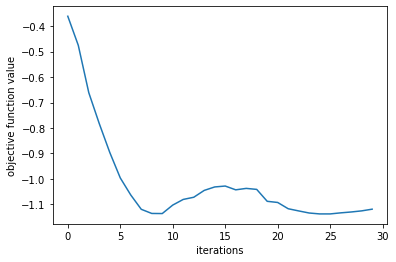

In [41]:
# circuit simulation LCU 
# stores no. of circuit evals
class_method = GIVE_ENERGY_Q_CIRC_LCU_CIRCUIT_class()

theta_ijab_random_input= 1#random.uniform(0, 2*np.pi)
n_shots=1000

custom_optimizer_DICT = {'learning_rate': 0.1, 'beta_1': 0.9, 'beta_2': 0.999, 'epsilon': 1e-8,
                           'maxfev': 15000}


LCU_optimization = Optimizer(class_method.GIVE_ENERGY_Q_CIRC_LCU_CIRCUIT,
                   theta_ijab_random_input,
                   args=(n_shots,),
                   method=Custom_Adam, 
                   jac=Analytical_Gradient_H2,
                   hess=None,
                   hessp=None,
                      bounds=None,
                   constraints=None,
                   tol=1e-4, 
                   display_convergence_message=True,
                   display_steps=True,
                   custom_optimizer_DICT=custom_optimizer_DICT)

LCU_optimization.get_env(50)
LCU_optimization.plot_convergence()
LCU_optimization.optimized_result

In [42]:
print('number of iterations: ', LCU_optimization.optimized_result.nit)
print('number of fn evals: ', LCU_optimization.optimized_result.nfev)

t_measurmets_list=[n_shots if i not in m_dict else m_dict[i]
                  for m_dict in class_method.n_circuit_eval_steps for i in [0,2,3]]
print('total no. of measurements: ', sum(t_measurmets_list))

number of iterations:  30
number of fn evals:  30
total no. of measurements:  249852


In [43]:
# # circuit simulation LCU

# theta_ijab_random_input= 1#random.uniform(0, 2*np.pi)

# GG = Optimizer(GIVE_ENERGY_Q_CIRC_LCU_CIRCUIT,
#                    theta_ijab_random_input,
#                    args=(),
#                    method='Nelder-Mead',
#                    jac=None,
#                    hess=None,
#                    hessp=None,
#                       bounds=None,
#                    constraints=None,
#                    tol=1e-8, 
#                    display_convergence_message=True,
#                    display_steps=True)
# GG.get_env(100)
# GG.plot_convergence()

0: Input_to_Funct: [0.9]: Output: -0.32412302694401945
1: Input_to_Funct: [0.7]: Output: -0.6398655182083117
2: Input_to_Funct: [0.3]: Output: -1.081147935009866
3: Input_to_Funct: [0.1]: Output: -1.1370190698544893
4: Input_to_Funct: [0.1]: Output: -1.1370190698544893
5: Input_to_Funct: [0.1]: Output: -1.1370190698544893
6: Input_to_Funct: [0.125]: Output: -1.1370419830414515
7: Input_to_Funct: [0.1125]: Output: -1.1372837048624882
8: Input_to_Funct: [0.1125]: Output: -1.1372837048624882
9: Input_to_Funct: [0.1125]: Output: -1.1372837048624882
10: Input_to_Funct: [0.1125]: Output: -1.1372837048624882
11: Input_to_Funct: [0.1125]: Output: -1.1372837048624882
12: Input_to_Funct: [0.11289062]: Output: -1.1372838156608838
13: Input_to_Funct: [0.11269531]: Output: -1.13728382207605
14: Input_to_Funct: [0.11279297]: Output: -1.1372838343220584
15: Input_to_Funct: [0.11279297]: Output: -1.1372838343220584
16: Input_to_Funct: [0.11279297]: Output: -1.1372838343220584
17: Input_to_Funct: [0.11

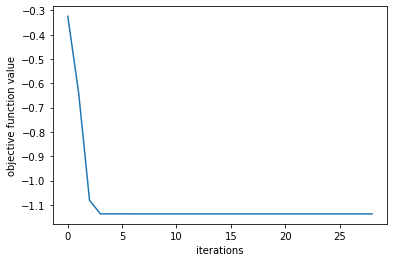

In [44]:
# lin alg LCU
theta_ijab_random_input= 1#random.uniform(0, 2*np.pi)

GG = Optimizer(GIVE_ENERGY_Q_CIRC_LCU_lin_alg,
                   theta_ijab_random_input,
                   args=(),
                   method='Nelder-Mead',
                   jac=None,
                   hess=None,
                   hessp=None,
                      bounds=None,
                   constraints=None,
                   tol=1e-8, 
                   display_convergence_message=True,
                   display_steps=True)
GG.get_env(100)
GG.plot_convergence()

## STANDARD VQE

In [45]:
def Get_pauli_matrix(PauliOp):
    pauliDict=   {'X':np.array([[0,1],[1,0]]),
                          'Y':np.array([[0,-1j],[1j,0]]),
                          'Z':np.array([[1,0],[0,-1]]),
                          'I': np.eye(2)}
    list_Q_nos, list_P_strs = list(zip(*[Paulistrs for Paulistrs, const in PauliOp.terms.items()][0]))

    list_of_ops = []
    for i in range(N_system_qubits):
        if i in list_Q_nos:
            index = list_Q_nos.index(i)
            list_of_ops.append(pauliDict[list_P_strs[index]])
        else:
            list_of_ops.append(pauliDict['I'])

    matrix = reduce(kron, list_of_ops)

    return matrix

def Lin_alg_standard_VQE(theta_ijab):
    zero_input = np.kron(np.array([[1],[0]]), np.array([[1],[0]])) # |00〉
    
    ansatz_cirq_circuit = H2_ansatz_BK(theta_ijab) # note this contains HF circuit!
    ansatz_mat = ansatz_cirq_circuit.unitary()
    
    ansatz_state_ket=ansatz_mat.dot(zero_input)
    ansatz_state_bra = ansatz_state_ket.transpose().conj()
    
    E_list=[]
    for H_sl in anti_commuting_sets.values():
        for P_op in H_sl:
            for Pauli, const in P_op.terms.items():
                if Pauli:
                    H_sub_term_matrix = Get_pauli_matrix(P_op)
                    energy = ansatz_state_bra.dot(H_sub_term_matrix.todense().dot(ansatz_state_ket))
                    E_list.append(energy.item(0) * const)
                else:
                    E_list.append(const)  
    return sum(E_list).real

In [46]:
Lin_alg_standard_VQE(theta_ijab)

-0.16321832203086745

In [47]:
# # lin alg LCU
# theta_ijab_random_input= 1#random.uniform(0, 2*np.pi)

# GG = Optimizer(Lin_alg_standard_VQE,
#                    theta_ijab_random_input,
#                    args=(),
#                    method='Nelder-Mead',
#                    jac=None,
#                    hess=None,
#                    hessp=None,
#                       bounds=None,
#                    constraints=None,
#                    tol=1e-8, 
#                    display_convergence_message=True,
#                    display_steps=True)
# GG.get_env(100)
# GG.plot_convergence()

In [48]:
def Calc_Energy_circuit_STANDARD_VQE(theta_ijab, n_shots):
    
    ansatz_cirq_circuit = H2_ansatz_BK(theta_ijab)
    
    E_list = []
    for set_key in anti_commuting_sets:
        for PauliOp in anti_commuting_sets[set_key]:
            if list(PauliOp.terms.keys())[0] == ():
                E_list.append(list(PauliOp.terms.values())[0])
            else:
                Q_circuit = Generate_Full_Q_Circuit(ansatz_cirq_circuit, PauliOp)
                hist_key_str = Get_Histogram_key(PauliOp)
                int_state_counter = Simulate_Quantum_Circuit(Q_circuit, n_shots, hist_key_str)
                binary_state_counter = Return_as_binary(int_state_counter, hist_key_str)
                exp_result = expectation_value_by_parity(binary_state_counter)
                E_list.append(exp_result * list(PauliOp.terms.values())[0])
                
    return sum(E_list).real

0: Input_to_Funct: [0.9]: Output: -0.3389096341862766
1: Input_to_Funct: [0.79995105]: Output: -0.5064559581253226
2: Input_to_Funct: [0.69995307]: Output: -0.647645429797444
3: Input_to_Funct: [0.60026329]: Output: -0.7545613417844154
4: Input_to_Funct: [0.50135444]: Output: -0.9315184136251989
5: Input_to_Funct: [0.40398468]: Output: -0.993219713844427
6: Input_to_Funct: [0.30926984]: Output: -1.073470373775394
7: Input_to_Funct: [0.21873061]: Output: -1.1092120090841184
8: Input_to_Funct: [0.13426643]: Output: -1.1345662494604518
9: Input_to_Funct: [0.05800225]: Output: -1.1319666520202691
10: Input_to_Funct: [-0.00800394]: Output: -1.1127726772320907
11: Input_to_Funct: [-0.06211535]: Output: -1.0897199620458413
12: Input_to_Funct: [-0.10338758]: Output: -1.0607348022718264
13: Input_to_Funct: [-0.13164962]: Output: -1.0464852306947217
14: Input_to_Funct: [-0.14740276]: Output: -1.0303389453120084
15: Input_to_Funct: [-0.15162872]: Output: -1.0249363360281476
16: Input_to_Funct: [-

     fun: -1.1334308739337735
 message: 'Optimization terminated successfully.'
    nfev: 50
     nit: 50
    njev: 50
  status: 0
 success: True
       x: array([0.07016243])

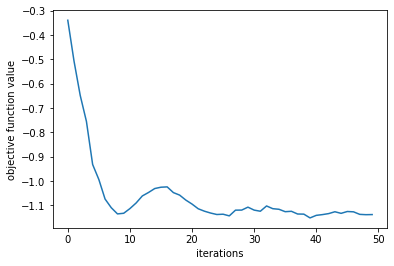

In [62]:
# circuit simulation LCU 
# stores no. of circuit evals
theta_ijab_random_input= 1#random.uniform(0, 2*np.pi)
n_shots=1000

custom_optimizer_DICT = {'learning_rate': 0.1, 'beta_1': 0.9, 'beta_2': 0.999, 'epsilon': 1e-8,
                           'maxfev': 15000}


standard_VQE_optimization = Optimizer(Calc_Energy_circuit_STANDARD_VQE,
                   theta_ijab_random_input,
                   args=(n_shots,),
                   method=Custom_Adam, 
                   jac=Analytical_Gradient_H2,
                   hess=None,
                   hessp=None,
                      bounds=None,
                   constraints=None,
                   tol=1e-4, 
                   display_convergence_message=True,
                   display_steps=True,
                   custom_optimizer_DICT=custom_optimizer_DICT)

standard_VQE_optimization.get_env(50)
standard_VQE_optimization.plot_convergence()
standard_VQE_optimization.optimized_result

In [63]:
print('number of iterations: ', standard_VQE_optimization.optimized_result.nit)
print('number of fn evals: ', standard_VQE_optimization.optimized_result.nfev)
print('total no. of measurements: ', standard_VQE_optimization.optimized_result.nfev*n_shots*5)

number of iterations:  50
number of fn evals:  50
total no. of measurements:  250000


In [64]:
anti_commuting_sets

{0: [(0.5731061703432151+0j) [Z0 Z1]],
 1: [(0.2460355896585992+0j) []],
 2: [(0.09060523100759853+0j) [Y0 Y1], (0.3428256528955378+0j) [Z0]],
 3: [(-0.4468630738162712+0j) [Z1], (0.09060523100759853+0j) [X0 X1]]}

In [65]:
len(anti_commuting_sets)-1

3

## Comparing total_N_samples and E

In [ ]:
# circuit simulation LCU 
# stores no. of circuit evals
class_method = GIVE_ENERGY_Q_CIRC_LCU_CIRCUIT_class()

theta_ijab_random_input= 1 #random.uniform(0, 2*np.pi)

start_shots=1e3
max_shots=1e6
tol=1e-6
max_iter=50


custom_optimizer_DICT = {'learning_rate': 0.1, 'beta_1': 0.9, 'beta_2': 0.999, 'epsilon': 1e-8,
                           'maxfev': 15000}




### STORE RESULTS
E_list_ROT=np.array([])
Total_M_ROT=np.array([])

E_list_LCU=np.array([])
Total_M_LCU=np.array([])

E_list_standard=np.array([])
Total_M_standard=np.array([])
####


for n_shots in np.arange(start_shots,max_shots,10000):
    
    n_shots_UP=int(np.floor(n_shots/len(anti_commuting_sets)-1))
    n_shots_STANDARD=int(np.floor(n_shots/len([_ for key in anti_commuting_sets \
                                               for term in anti_commuting_sets[key]])-1))

    ####
    
    ROT_optimization = Optimizer(GIVE_ENERGY_Q_CIRC_ROTATIONS,
                   theta_ijab_random_input,
                   args=(n_shots_UP,),
                   method=Custom_Adam, 
                   jac=Analytical_Gradient_H2,
                   tol=tol, 
                   display_convergence_message=False,
                   display_steps=False,
                   custom_optimizer_DICT=custom_optimizer_DICT)

    ROT_optimization.get_env(max_iter)
    
    E_ROT = ROT_optimization.optimized_result.fun
    total_N_M_ROT = ROT_optimization.optimized_result.nfev*n_shots_UP*(len(anti_commuting_sets)-1)
    
    ####
    
    class_method = GIVE_ENERGY_Q_CIRC_LCU_CIRCUIT_class()
    LCU_optimization = Optimizer(class_method.GIVE_ENERGY_Q_CIRC_LCU_CIRCUIT,
                   theta_ijab_random_input,
                   args=(n_shots_UP,),
                   method=Custom_Adam, 
                   jac=Analytical_Gradient_H2,
                   tol=tol, 
                   display_convergence_message=False,
                   display_steps=False,
                   custom_optimizer_DICT=custom_optimizer_DICT)
    
    LCU_optimization.get_env(max_iter)
    
    E_LCU = LCU_optimization.optimized_result.fun
    
    t_measurmets_list=[n_shots_UP if i not in m_dict else m_dict[i]
                  for m_dict in class_method.n_circuit_eval_steps for i in [0,2,3]]
    total_N_M_LCU = sum(t_measurmets_list)
    
    ####
    
    standard_VQE_optimization = Optimizer(Calc_Energy_circuit_STANDARD_VQE,
                   theta_ijab_random_input,
                   args=(n_shots_STANDARD,),
                   method=Custom_Adam, 
                   jac=Analytical_Gradient_H2,
                   tol=tol, 
                   display_convergence_message=False,
                   display_steps=False,
                   custom_optimizer_DICT=custom_optimizer_DICT)
    
    standard_VQE_optimization.get_env(max_iter)
    
    total_N_M_standard_VQE = standard_VQE_optimization.optimized_result.nfev*n_shots_STANDARD*(len([_ for key in anti_commuting_sets for term in anti_commuting_sets[key]])-1)
    E_standard = standard_VQE_optimization.optimized_result.fun

    
    E_list_ROT= np.hstack((E_list_ROT,E_ROT))
    Total_M_ROT= np.hstack((Total_M_ROT,total_N_M_ROT))

    E_list_LCU= np.hstack((E_list_LCU,E_LCU))
    Total_M_LCU= np.hstack((Total_M_LCU,total_N_M_LCU))

    E_list_standard= np.hstack((E_list_standard,E_standard))
    Total_M_standard= np.hstack((Total_M_standard,total_N_M_standard_VQE))
    

In [ ]:
%matplotlib notebook
fig, ax = plt.subplots()

ax.plot(Total_M_ROT, E_list_ROT-new_FCI_Energy, color='b', label='circuit rotations method')
ax.plot(Total_M_LCU, E_list_LCU-new_FCI_Energy, color='r', label='circuit LCU method', linestyle='--')
ax.plot(Total_M_standard, E_list_standard-new_FCI_Energy, color='k', label='standard VQE', linestyle='--')

# ax.plot(ijab_angles, energies_rot_LinAlg, color='g', label='Lin Alg ROT')
# ax.plot(ijab_angles, energies_lcu_LinAlg, color='k', label='Lin Alg LCU', linestyle='--')


ax.set(xlabel='N_samples', ylabel='$\Delta $E / Ha')
#                                         ,title='Scaling of methods')
ax.grid()
plt.legend()

In [ ]:
new_FCI_Energy

In [ ]:
ijab_angles=np.arange(0,2*pi,0.1)

energies_rot_circuit=[GIVE_ENERGY_Q_CIRC_ROTATIONS(theta) for theta in ijab_angles]
n_ROT_circuit_M = [n_shots*3 for _ in range(len(energies_rot_circuit))]

# energies_lcu_circuit=[GIVE_ENERGY_Q_CIRC_LCU_CIRCUIT(theta) for theta in ijab_angles]
LCU_method_record_no_M = GIVE_ENERGY_Q_CIRC_LCU_CIRCUIT_class()
energies_lcu_circuit=[LCU_method_record_no_M.GIVE_ENERGY_Q_CIRC_LCU_CIRCUIT(theta) for theta in ijab_angles]
n_LCU_circuit_M=[sum([n_shots if i not in m_dict else m_dict[i] for i in [0,2,3]]) for m_dict in LCU_method_record_no_M.n_circuit_eval_steps]

energies_standard_VQE_circuit=[Calc_Energy_circuit_STANDARD_VQE(theta, anti_commuting_sets, n_shots) for theta in ijab_angles]
n_VQE_standard_circuit_M = [n_shots*5 for _ in range(len(energies_standard_VQE_circuit))]

energies_rot_LinAlg=[GIVE_ENERGY_lin_alg_ROTATIONS(theta) for theta in ijab_angles]
energies_lcu_LinAlg=[GIVE_ENERGY_Q_CIRC_LCU_lin_alg(theta) for theta in ijab_angles]

In [ ]:
%matplotlib notebook
fig, ax = plt.subplots()

ax.plot(ijab_angles, energies_rot_circuit, color='b', label='circuit rotations method')
ax.plot(ijab_angles, energies_lcu_circuit, color='r', label='circuit LCU method', linestyle='--')
ax.plot(ijab_angles, energies_standard_VQE_circuit, color='k', label='standard VQE', linestyle='--')

# ax.plot(ijab_angles, energies_rot_LinAlg, color='g', label='Lin Alg ROT')
# ax.plot(ijab_angles, energies_lcu_LinAlg, color='k', label='Lin Alg LCU', linestyle='--')


ax.set(xlabel='Angle', ylabel='Energy')
#                                         ,title='Scaling of methods')
ax.grid()
plt.legend()

In [ ]:
N

In [ ]:
# %matplotlib notebook
# # https://stackoverflow.com/questions/32474434/trying-to-plot-a-line-plot-on-a-bar-plot-using-matplotlib

# plt.figure()          
# N = len(n_ROT_circuit_M)
# width = 0.35       # the width of the bars

# ind = np.arange(0, N)
# plt.ylim(0.0, max(n_LCU_circuit_M))
# plt.bar(ind, n_LCU_circuit_M, width, color='r', label='LCU measurments')

# plt.bar(ind+width, n_ROT_circuit_M, width, color='b', label='ROT measurements')
# plt.ylabel('Bar plot')      




# axes2 = plt.twinx()
# axes2.plot(ind, energies_rot_circuit, color='g', label='circuit rotations method')
# axes2.plot(ind, energies_lcu_circuit, color='k', label='circuit LCU method', linestyle='--')
# axes2.set_ylabel('Energy')

# plt.show()

In [ ]:
%matplotlib notebook
# https://stackoverflow.com/questions/32474434/trying-to-plot-a-line-plot-on-a-bar-plot-using-matplotlib
# https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/bar_stacked.html

# plt.figure()          
plt.figure(figsize=(10, 5))

N = len(n_ROT_circuit_M)
width = 0.35       # the width of the bars

ind = np.arange(0, N)
plt.ylim(0.0, max(n_VQE_standard_circuit_M))
  

plt.bar(ind, n_ROT_circuit_M, width, color='b', label='No. of Rotation circuit measurements')
plt.bar(ind, n_LCU_circuit_M, width, color='r', label='No. of LCU circuit measurements', bottom=n_ROT_circuit_M)
plt.bar(ind, n_VQE_standard_circuit_M, width, color='k', label='No. of LCU circuit measurements', bottom=n_LCU_circuit_M)

plt.ylabel('Number of Measurements - bars')   
plt.legend()

axes2 = plt.twinx()
axes2.plot(ind, energies_rot_circuit, color='g', label='circuit rotations method')
axes2.plot(ind, energies_lcu_circuit, color='k', label='circuit LCU method', linestyle='--')
axes2.plot(ind, energies_standard_VQE_circuit, color='m', label='standard VQE', linestyle='--')
# axes2.set_ylabel('Energy - line')
axes2.set(xlabel='Angle', ylabel='Energy - line')

plt.legend()
plt.show()

In [ ]:
from quchem.latex_tables import *

In [ ]:
latex_table_Hamiltonian(anti_commuting_sets, 'Latex_table1')
latex_table_seq_rot(anti_commuting_sets, 'Latex_table2', 0)
latex_table_LCU(anti_commuting_sets, 'Latex_table3', 0)
latex_table_LCU_R_op(anti_commuting_sets, 'Latex_table4', 0)